<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_07_Airlines(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [14]:
airlines = pd.read_csv("EastWestAirlines.csv")

In [15]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airlines_df = scaler.fit_transform(airlines.iloc[:,1:])

In [16]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

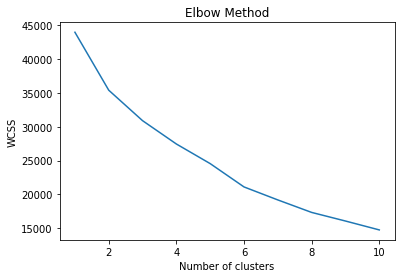

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(8, random_state=42)
clusters_new.fit(scaled_airlines_df)

KMeans(random_state=42)

In [19]:
clusters_new.labels_

array([0, 0, 0, ..., 7, 6, 6], dtype=int32)

In [20]:
#Assign clusters to the data set
airlines['clusterid_new'] = clusters_new.labels_

In [21]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.14232046, -0.14410972, -0.41085965, -0.09824189, -0.05752883,
        -0.45301311, -0.33026753, -0.20382759, -0.22278692,  0.73265771,
        -0.7669193 ],
       [ 1.24396101,  0.53016896,  0.25203552, -0.09824189, -0.06276658,
         0.82768261,  1.90240145,  4.04732387,  4.29804926,  0.30654091,
         0.93352447],
       [ 0.64278782, -0.10624666,  1.5556267 , -0.09824189, -0.05027262,
         1.36988578,  0.87037337, -0.05079643, -0.0509151 ,  0.40607186,
         0.53871846],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.41182718,  7.12219641, -0.0297777 , -0.09824189, -0.06276658,
         0.04544156,  0.05881382,  0.30911931,  0.34093757, -0.07634936,
         0.306

In [22]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1157.270684,59285.212462,32.602656,1.495403,1.000000,1.001021,6222.193054,8.430031,175.175689,0.530133,5629.152196,0.000000
1,1,1701.642276,198946.650407,554.235772,2.406504,1.000000,1.000000,37131.682927,29.869919,6126.447154,17.674797,4751.528455,0.821138
2,2,1556.858537,138370.597561,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,2074.462963,115098.296296,5653.611111,2.018519,1.000000,1.000000,18242.166667,12.166667,892.833333,2.666667,3960.907407,0.518519
6,6,3137.226840,34625.162771,32.734199,1.253680,1.000000,1.000000,4432.968831,6.647619,150.138528,0.450216,2086.555844,0.000000
7,7,1950.981481,58169.349383,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000


In [23]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,7
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,7
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,7
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6
